In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

%matplotlib inline

In [211]:
final_df = pd.read_csv('energy_weather_price.csv')
final_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0


In [212]:
final_df['time'] = pd.to_datetime(final_df['time'], utc = True, infer_datetime_format = True)

In [213]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

In [214]:
final_df = final_df.set_index('time')
final_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0


### Generating Features

As we discussed before, the typical business hours in Spain are from 9-5. They usually have a gap or a break in between for a 'Siesta'. This can imply reduced power consumption during those hours for businesses and hence possibly the electricity prices too.
Typical work day in Spain is as follows : 

- 9:30 - 1:30 and 4:30 - 8:30 : Business hours
- 1:30 - 4:30 : Siesta

Hence we classify each hour as a business hour or non business hour. 
In order to do that, we first extract the hour information from each time index entry. 

In [215]:
for i in range(len(final_df)):
    hour_index = final_df.index[i]
    hour = hour_index.hour
    if (hour > 8 and hour < 14) or (hour > 16 and hour < 21):
        final_df.loc[hour_index, 'business hour'] = 1
    else:
        final_df.loc[hour_index, 'business hour'] = 0

### Creating necessary plotting functions

In [216]:
# fucntion
def plot_data(df = None, col = None, series = pd.Series([]),
             label = None, ylabel = None, title = None, start = 0, end = None):
    """ This function plots a certain column in a dataframe or a series as time series data """
    sns.set()
    fig, ax = plt.subplots(figsize = (30, 10))
    ax.set_xlabel('Time', fontsize = 16)
    if col:
        ax.plot(df[col][start:end], label = label)
        ax.set_ylabel(ylabel, fontsize = 16)
        
    if series.any():
        ax.plot(series, label = label)
        ax.set_ylabel(ylabel, fontsize = 16)
        
    if label:
        ax.legend(fontsize = 16)
    
    if title:
        ax.set_title(title, fontsize = 24)
        
    ax.grid(True)
    
    return ax

/var/folders/2m/bw7b0yl10pd5xq1nwf0z6g6m0000gn/T/ipykernel_89650/2107028491.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_data(df = None, col = None, series = pd.Series([]),


In [260]:
# plotting metrics function

def plot_metrics(fit_hist):
    
    # Evaluating training and validation metrics 
    tr_rmse = fit_hist.history['root_mean_squared_error']
    val_rmse = fit_hist.history['val_root_mean_squared_error']
    
    tr_loss = fit_hist.history['loss']
    val_loss = fit_hist.history['val_loss']
    
    plt.figure(figsize = (15, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(tr_rmse, label = 'Training RMSE')
    plt.plot(val_rmse, label = 'Validation RMSE')
    plt.legend()
    plt.title('Epochs vs Training and Validation RMSE')
    
    plt.subplot(2, 1, 2)
    plt.plot(tr_loss, label = 'Training loss')
    plt.plot(val_loss, label = 'Validation loss')
    plt.legend()
    plt.title('Epochs vs training and Validation loss')
    

## Preprocessing and Modeling

Here on we start with the preprocessing and modeling. 
We start with a simple ARIMA model and then move on to a more complex model in the subsequent analysis

Since the time series is stationary, we start simple by evaluating the time series of the price alone using an ARIMA model and evaluating it against different parameters of p, q and d. For simplicity, we take only the hourly values for the year 2018 and run an ARIMA model on that year.

In [218]:
for k in range(len(final_df)):
    hour_index = final_df.index[k]
    year = hour_index.year
    final_df.loc[hour_index, 'year'] = year

In the above cells we fit our model on price data from 2015- 2017 and forecasted the prices for the year 2018 and 2019. We then compared this to the actual price of electricity for they year 2018. We see that the line goes through most of the data points and continues to extend for the year 2019. 

Next we will consider a machine learning approach to predict the price in an attempt to better fit the data.

## Time Series Forecasting using ML models


### Data Pre processing

In this section we focus on performing time series forecasting using ML methods. While in the ARIMA model, we only used the time series alone to predict the future price, for the ML models we test two types of models - 

1) Using LSTM to predict the price using the price alone. This is a univariate analysis.

2) Using LSTM to predict the price using the other features as part of our analysis as well. However which features to use, we base it off of the PCA analysis. 

## LSTM Univariate analysis


In [219]:
# Contains the hourly prices
prices = final_df.reset_index()['price actual']

In [220]:
prices

0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, Length: 35064, dtype: float64

<AxesSubplot:title={'center':'Hourly actual prices of electricity'}, xlabel='Time', ylabel='Hourly prices'>

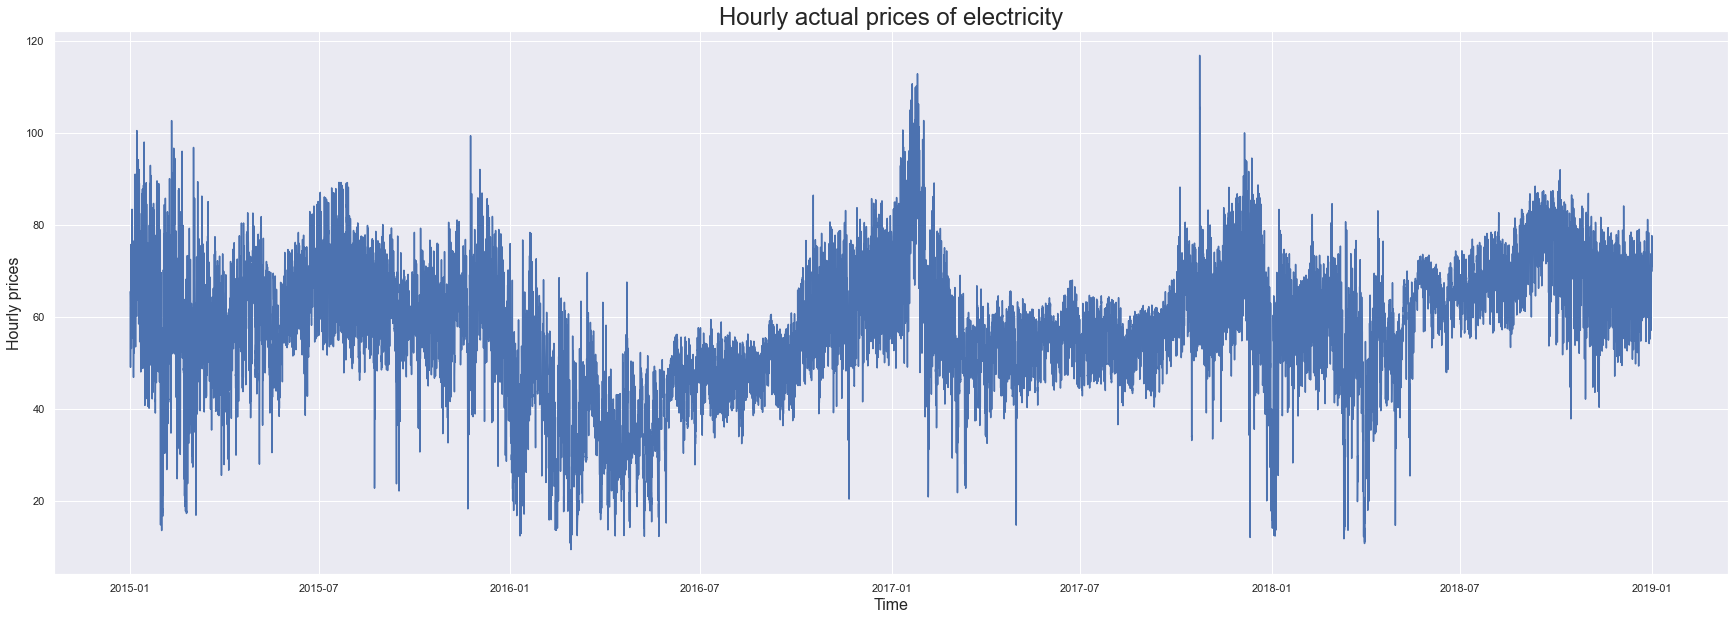

In [221]:
plot_data(series = final_df['price actual'], ylabel = 'Hourly prices', title = 'Hourly actual prices of electricity')

In [222]:
from sklearn.preprocessing import MinMaxScaler

In [223]:
scaler_price = MinMaxScaler(feature_range = (0,1))
prices = scaler_price.fit_transform(np.array(prices).reshape(-1,1))

In [224]:
print(prices)

[[0.52182004]
 [0.51726063]
 [0.51316647]
 ...
 [0.6045408 ]
 [0.56350609]
 [0.56341305]]


In [225]:
train_size = int(len(prices) * 0.7)
prices_tr = prices[: train_size]
prices_te = prices[train_size : ]

In [226]:
prices.shape, prices_tr.shape, prices_te.shape

((35064, 1), (24544, 1), (10520, 1))

In [227]:
# converts the array into a train and test data set, 
#with number of samples in the train dataset  = no. of time_steps
def create_univariate(data, time_step = 1):
    dataX = []
    dataY = []
    for i in range(len(data) - (time_step + 1)):
        a = data[i : (i + time_step), 0]
        dataX.append(a)
        dataY.append(data[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [228]:
step_size = 1
X_tr, y_tr = create_univariate(prices_tr, step_size)
X_te, y_te = create_univariate(prices_te, step_size)

In [229]:
X_tr.shape, y_tr.shape

((24542, 1), (24542,))

In [230]:
X_te.shape, y_te.shape

((10518, 1), (10518,))

In [231]:
# retrain data into [samples, time steps, features] to be compatible with LSTM input format
X_tr = X_tr.reshape(X_tr.shape[0], X_tr.shape[1], 1)
X_te = X_te.reshape(X_te.shape[0], X_te.shape[1], 1)

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
loss = MeanSquaredError()

metric = RootMeanSquaredError()

In [246]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (step_size, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = loss, metrics = metric, optimizer = 'adam')

In [247]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 50)             10400     
                                                                 
 lstm_43 (LSTM)              (None, 1, 50)             20200     
                                                                 
 lstm_44 (LSTM)              (None, 50)                20200     
                                                                 
 dense_24 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [248]:
model_hist = model.fit(X_tr, y_tr, validation_data = (X_te, y_te), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
384/384 [==============================] - 5s 5ms/step - loss: 0.0163 - root_mean_squared_error: 0.1077 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 2/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0013 - root_mean_squared_error: 0.0357 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 3/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 4/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 5/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 6/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 

384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 49/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 50/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 51/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 52/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 53/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 - val_r

384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 96/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 97/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345
Epoch 98/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 99/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 100/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0011 - val_

In [249]:
# Performing predictions on train and test models
train_predict = model.predict(X_tr)
test_predict = model.predict(X_te)

In order to evaluate the performance metrics we first inverse transform the data back to its original scaling - before performing the MinMaxScaler()

In [250]:
train_predict = scaler_price.inverse_transform(train_predict)
test_predict = scaler_price.inverse_transform(test_predict)

In [251]:
import math

In [252]:
y_tr = y_tr.reshape(-1,1)
y_te = y_te.reshape(-1,1)
y_tr_inv = scaler_price.inverse_transform(y_tr)
y_te_inv = scaler_price.inverse_transform(y_te)

In [253]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_tr_inv, train_predict)

13.3945199823019

In [254]:
mean_squared_error(y_te_inv, test_predict)

12.967243678120644

In [305]:
from math import sqrt
sqrt(12.967243678120644)

3.601005925865805

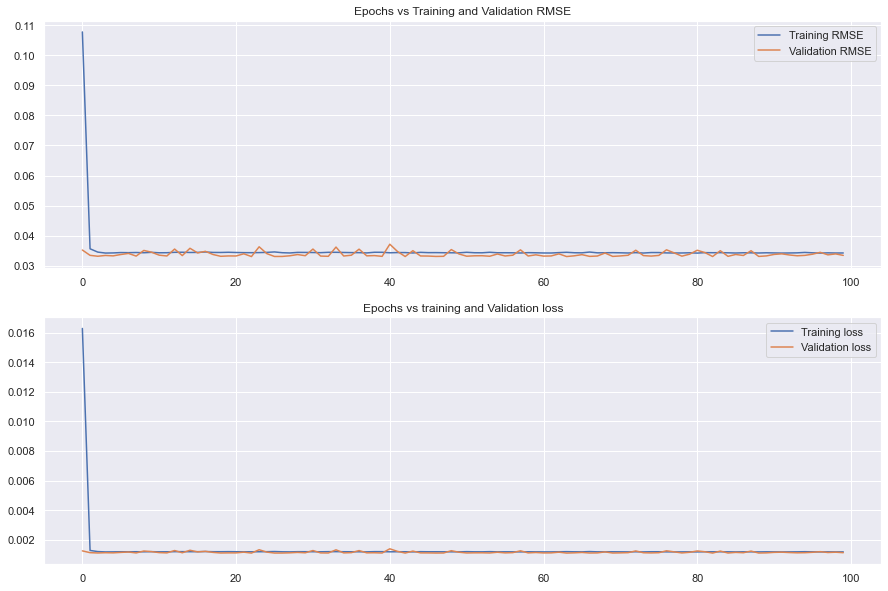

In [261]:
plot_metrics(model_hist)

We see that considering a step size of 1 that is only considering the immediate past value gives us a MSE in the range of 7.1- 7.3. Lets try increasing the number of previous time observations in our model and look at its performance.

In [262]:
step_size = 12
X_tr, y_tr = create_univariate(prices_tr, step_size)
X_te, y_te = create_univariate(prices_te, step_size)

In [263]:
# retrain data into [samples, time steps, features] to be compatible with LSTM input format
X_tr = X_tr.reshape(X_tr.shape[0], X_tr.shape[1], 1)
X_te = X_te.reshape(X_te.shape[0], X_te.shape[1], 1)

In [264]:
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError

loss = MeanSquaredError()

metric = RootMeanSquaredError()

In [265]:

model1 = Sequential()
model1.add(LSTM(250, return_sequences = True, input_shape = (step_size, 1)))
model1.add(LSTM(150, return_sequences = True))
model1.add(Flatten())
model1.add(Dense(150, activation = 'relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1))
model1.compile(loss = loss, metrics = metric,optimizer = 'adam')

In [266]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 12, 250)           252000    
                                                                 
 lstm_46 (LSTM)              (None, 12, 150)           240600    
                                                                 
 flatten_9 (Flatten)         (None, 1800)              0         
                                                                 
 dense_25 (Dense)            (None, 150)               270150    
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                                 
 dense_26 (Dense)            (None, 1)                 151       
                                                                 
Total params: 762,901
Trainable params: 762,901
Non-t

In [267]:
model1_hist = model1.fit(X_tr, y_tr, validation_data = (X_te, y_te), epochs = 50, batch_size =64, verbose = 1)

Epoch 1/50
384/384 [==============================] - 17s 40ms/step - loss: 0.0075 - root_mean_squared_error: 0.0867 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 2/50
384/384 [==============================] - 15s 39ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 7.4569e-04 - val_root_mean_squared_error: 0.0273
Epoch 3/50
384/384 [==============================] - 15s 38ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 4/50
384/384 [==============================] - 15s 39ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 8.5949e-04 - val_root_mean_squared_error: 0.0293
Epoch 5/50
384/384 [==============================] - 15s 39ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 6/50
384/384 [==============================] - 15s 40ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val

384/384 [==============================] - 17s 44ms/step - loss: 7.1499e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.4476e-04 - val_root_mean_squared_error: 0.0254
Epoch 47/50
384/384 [==============================] - 17s 44ms/step - loss: 7.1247e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.2681e-04 - val_root_mean_squared_error: 0.0250
Epoch 48/50
384/384 [==============================] - 17s 44ms/step - loss: 7.1991e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.1577e-04 - val_root_mean_squared_error: 0.0248
Epoch 49/50
384/384 [==============================] - 17s 44ms/step - loss: 7.1097e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.8329e-04 - val_root_mean_squared_error: 0.0261
Epoch 50/50
384/384 [==============================] - 17s 44ms/step - loss: 7.1761e-04 - root_mean_squared_error: 0.0268 - val_loss: 6.2613e-04 - val_root_mean_squared_error: 0.0250


In [268]:
# Performing predictions on train and test models
train_predict = model1.predict(X_tr)
test_predict = model1.predict(X_te)

In [269]:
train_predict = scaler_price.inverse_transform(train_predict)
test_predict = scaler_price.inverse_transform(test_predict)

In [270]:
y_tr = y_tr.reshape(-1,1)
y_te = y_te.reshape(-1,1)
y_tr_inv = scaler_price.inverse_transform(y_tr)
y_te_inv = scaler_price.inverse_transform(y_te)

In [271]:
mean_squared_error(y_tr_inv, train_predict)

7.10467686824634

In [272]:
mean_squared_error(y_te_inv, test_predict)

7.231653269393083

In [306]:
sqrt(7.231653269393083)

2.6891733431285316

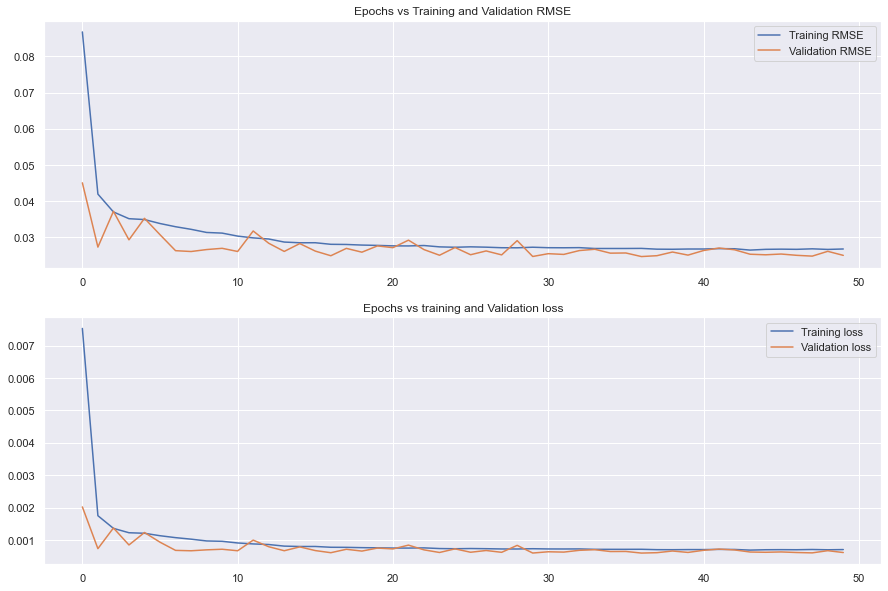

In [273]:
plot_metrics(model1_hist)

### Multivariate LSTM model

In [274]:
# Normalizing the data
X = final_df[final_df.columns.drop('price actual')].values

y = final_df['price actual'].values



In [275]:
""" The reshaping is done so it can be in a form that is ready for applying the normalizing techniques. Typically
there has to be atleast one column, and the number of rows have to be the same as the X data."""
y = y.reshape(-1, 1)
y.shape


(35064, 1)

In [276]:
y

array([[65.41],
       [64.92],
       [64.48],
       ...,
       [74.3 ],
       [69.89],
       [69.88]])

In [277]:
# importing modules for scaling and preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

scale_X = MinMaxScaler(feature_range = (0, 1))
scale_Y = MinMaxScaler(feature_range = (0, 1))

# creating an index to split data set into train and test. 
# Train dataset size = 70% of original dataset
train_split_index = int(0.7 * len(final_df)) 

# fit the scaler only on the training data
scale_X.fit(X[:train_split_index])
scale_Y.fit(y[:train_split_index])
    

MinMaxScaler()

In [278]:
# transform the whole data set using the scaler 
X_norm = scale_X.transform(X)
y_norm = scale_Y.transform(y)

In [279]:
# initializing a PCA object
pca = PCA()
# perform PCA only on training data to see what what features of the training data are most important
X_pca = pca.fit(X_norm[:train_split_index])

In [280]:
pca.explained_variance_ratio_

array([1.98574061e-01, 9.54844174e-02, 8.97033230e-02, 6.43776388e-02,
       5.62263509e-02, 4.82115569e-02, 4.00792297e-02, 3.77584717e-02,
       3.31809471e-02, 2.91602845e-02, 2.80346640e-02, 2.55513809e-02,
       2.27123456e-02, 2.02758701e-02, 1.98529153e-02, 1.92567552e-02,
       1.61180418e-02, 1.46937154e-02, 1.35327674e-02, 1.11491197e-02,
       9.84279842e-03, 8.72848854e-03, 7.93402858e-03, 7.66714061e-03,
       7.35193224e-03, 6.08008934e-03, 5.16507665e-03, 5.03721262e-03,
       4.85139932e-03, 4.60019929e-03, 4.24731791e-03, 4.17065739e-03,
       3.86334894e-03, 3.64500787e-03, 3.21976108e-03, 2.88736634e-03,
       2.72700769e-03, 2.28709866e-03, 2.20724962e-03, 1.96597558e-03,
       1.75199788e-03, 1.66556048e-03, 1.61375228e-03, 1.48654500e-03,
       1.45950886e-03, 1.26274218e-03, 1.13538160e-03, 1.06405581e-03,
       1.00060288e-03, 9.82958576e-04, 8.33792579e-04, 6.43907916e-04,
       5.94624953e-04, 5.08914771e-04, 4.55320495e-04, 3.23752829e-04,
      

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

reference - https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6


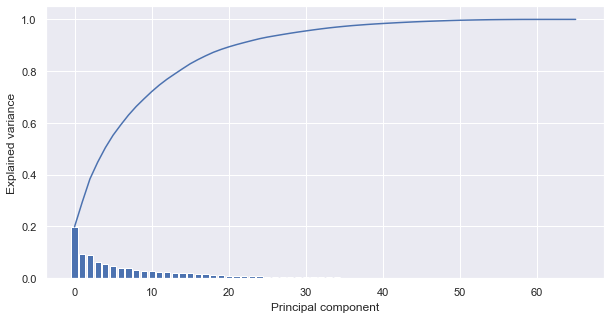

In [281]:
components = len(pca.explained_variance_ratio_)

plt.figure(figsize = (10, 5))

# plotting the variance or each feature
plt.bar( np.arange(components), pca.explained_variance_ratio_)

# plotting the cumulative explained variance ratio as a fucntion of each feature
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Setting labels
plt.xlabel('Principal component')
plt.ylabel('Explained variance')

plt.show()

We now apply PCA such that we only keep features that help us account for 80% of the variance

In [282]:
pca = PCA(n_components = 0.8)
pca.fit(X_norm[:train_split_index])
X_pca = pca.transform(X_norm)

In [283]:
X_pca.shape

(35064, 15)

We see that we need only 15 of the total 66 to account for 80% of the variance. 

Having done a PCA we can now move on to bulding our ML models.

## LSTM - Multivariate

Here we run a LSTM model on the noralized data set. First lets combine the X and Y before we create the train and test split dataset

In [284]:
normal_dataset = np.concatenate((X_pca, y_norm), axis = 1)

In [285]:
def create_dataset(data, time_step = 1):
    dataX = []
    dataY = []
    
    for i in range(len(data) - (time_step + 1)):
        a = data[i: (i + time_step)]
        dataX.append(a)
        dataY.append(data[i + time_step, -1])
        
    return np.array(dataX), np.array(dataY)

In [286]:
normal_dataset.shape

(35064, 16)

In [287]:
train_data = normal_dataset[:train_split_index, :]
test_data = normal_dataset[train_split_index : len(normal_dataset), :]

In [288]:
train_data.shape, test_data.shape

((24544, 16), (10520, 16))

In [289]:
step_size = 1
X_train, y_train = create_dataset(train_data, step_size)
X_test, y_test = create_dataset(test_data,step_size)

In [290]:
X_train.shape, y_train.shape

((24542, 1, 16), (24542,))

In [291]:
X_test.shape, y_test.shape

((10518, 1, 16), (10518,))

In [292]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(24542, 1, 16)

In [293]:
# Reshaping train and t
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

Thus we now have a three dimenionsal data set that basically inlcudes the information from the previous time point in the X, and the price value of the current time point in the y.  We are now set up for creating and fitting our LSTM model.


In [294]:
# design the network
model2 = Sequential()
model2.add(LSTM(250, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model2.add(LSTM(150, return_sequences = True))
model2.add(Flatten())
model2.add(Dense(150, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.compile(loss = loss, metrics = metric, optimizer = 'adam')


In [295]:
model2_hist = model2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50,batch_size = 64, verbose = 1 )

Epoch 1/50
384/384 [==============================] - 5s 7ms/step - loss: 0.0083 - root_mean_squared_error: 0.0773 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 2/50
384/384 [==============================] - 2s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 3/50
384/384 [==============================] - 2s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 4/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 5/50
384/384 [==============================] - 2s 6ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 6/50
384/384 [==============================] - 3s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0013 - val_

384/384 [==============================] - 2s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 49/50
384/384 [==============================] - 2s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 50/50
384/384 [==============================] - 2s 6ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357


In [296]:
tr_predict = model2.predict(X_train)
te_predict = model2.predict(X_test)

In [297]:
inv_tr_predict = scale_Y.inverse_transform(tr_predict)
inv_te_predict = scale_Y.inverse_transform(te_predict)

In [298]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_tr_inv = scale_Y.inverse_transform(y_train)
y_te_inv = scale_Y.inverse_transform(y_test)

In [299]:
mean_squared_error(y_tr_inv, inv_tr_predict)

12.78362028085821

In [300]:
mean_squared_error(y_te_inv, inv_te_predict)

13.655573781297688

In [307]:
sqrt(13.655573781297688)

3.695344879885731

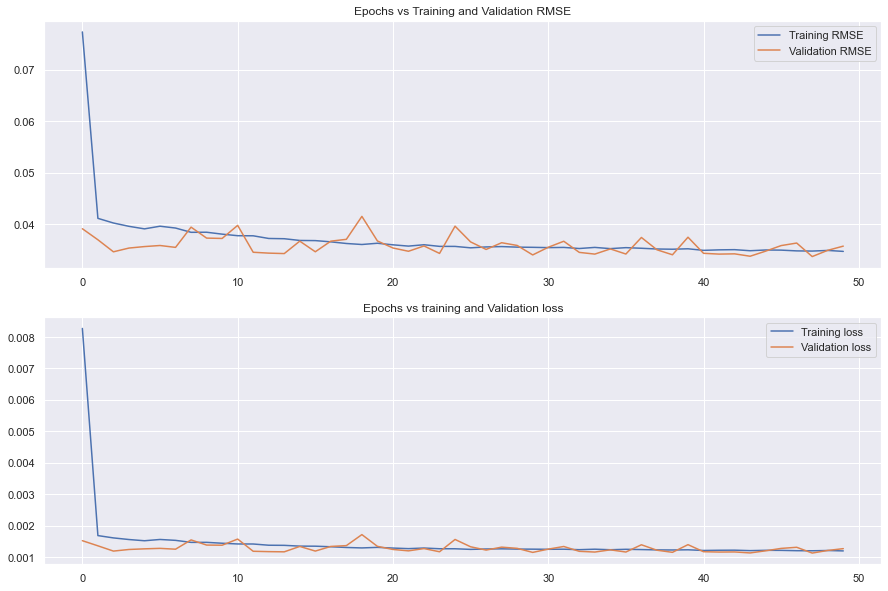

In [301]:
plot_metrics(model2_hist)